# Question 1
(a) Given a line of text as follows:

*A07CS0030 -- 89 - 2020-12-20 – Pass -- SCSP3223*

The line of text represents matric number, scores for test, date where the data is updated and
lastly the subject code.

Using regular expression, write the python code that can extract the individual information
from the text. 

In [20]:
import pandas as pd
import numpy as np

In [51]:
import re

text = "A07CS0030 -- 89 - 2020-12-20 – Pass -- SCSP3223"

# Define the regular expressions for each piece of information
matric_number_pattern = re.compile(r'([A-Z]\d{2}[A-Z]{2}\d{4})')
scores_pattern = re.compile(r'-- (\d{1,3}) -')
date_pattern = re.compile(r'(\d{4}-\d{2}-\d{2})')
pass_pattern = re.compile(r' (\w+) --')
subject_code_pattern = re.compile(r'([A-Z]{4}\d{4}+)')

# Extract information using regular expressions
matric_number_match = matric_number_pattern.search(text)
scores_match = scores_pattern.search(text)
date_match = date_pattern.search(text)
pass_match = pass_pattern.search(text)
subject_code_match = subject_code_pattern.search(text)

# Print the extracted information
if matric_number_match:
    matric_number = matric_number_match.group(1)
    print("Matric Number:", matric_number)

if scores_match:
    scores = scores_match.group(1)
    print("Scores:", scores)

if date_match:
    date = date_match.group(1)
    print("Date:", date)

if pass_match:
    pass_info = pass_match.group(1)
    print("Pass:", pass_info)

if subject_code_match:
    subject_code = subject_code_match.group(1)
    print("Subject Code:", subject_code)


Matric Number: A07CS0030
Scores: 89
Date: 2020-12-20
Pass: Pass
Subject Code: SCSP3223


(b) Given a data (data-q1-2.csv) that contains the readings from sensor integrated in different
rooms in a building to track the temperature of the rooms. However, there are two condition
where the data might be problematic:
- The readings sometimes returned as missing value
- The readings sometimes returned error values: 999.9

These problems can be seen in data-q1-2.csv.

(i) Show the number of missing values in the data for each of the columns. (1 mark)

(ii) Write the python code to convert the error values into NaN. Then fill the missing values
(in NaN) according to the average temperature of the entire data. (4 marks)

(iii) Rename the labels of the columns to Room1, Room2, Room3, Room4, respectively.
(1 mark)

In [71]:
# Question 1

df1 = pd.read_csv('data-q1-2.csv')
df1.head()

TIME  tmps001  tmps002  tmps003  tmps004
0  0:00   999.90    24.99    24.33      NaN
1  0:20    26.71    25.99    25.33    26.25
2  0:40    26.21    26.83    26.60    26.99
3  1:00    27.72    27.30    26.25    26.53
4  1:20    26.27    25.58    25.55    25.76

In [72]:
#(i) Show the number of missing values in the data for each of the columns. (1 mark)
df1.isna().sum()

TIME       0
tmps001    2
tmps002    1
tmps003    1
tmps004    3
dtype: int64

In [79]:
#(ii) Write the python code to convert the error values into NaN. Then fill the missing values (in NaN) according to the average temperature of the entire data. (4 marks)

# Convert error values (999.9) to NaN
df1.replace(999.9, pd.NA, inplace=True)

# Convert columns to numeric (in case they are not)
df1 = df1.apply(pd.to_numeric, errors='coerce')

# Fill missing values with the average temperature of the entire data
average_temperature = df1.stack().mean()
df1.fillna(average_temperature, inplace=True)

# Display the modified DataFrame
print("Modified DataFrame:")
df1

Modified DataFrame:


TIME  tmps001  tmps002  tmps003  tmps004
0   26.459   26.459   24.990   24.330   26.459
1   26.459   26.710   25.990   25.330   26.250
2   26.459   26.210   26.830   26.600   26.990
3   26.459   27.720   27.300   26.250   26.530
4   26.459   26.270   25.580   25.550   25.760
5   26.459   25.650   25.390   25.660   25.830
6   26.459   26.320   26.080   26.110   26.310
7   26.459   25.890   26.459   25.440   26.200
8   26.459   26.160   25.340   26.300   25.510
9   26.459   25.670   25.270   25.780   26.310
10  26.459   26.320   25.470   26.070   26.420
11  26.459   26.230   26.880   26.459   26.580
12  26.459   26.610   25.840   26.459   26.540
13  26.459   26.510   26.300   26.230   26.459
14  26.459   26.690   27.030   27.580   27.840
15  26.459   26.459   26.459   26.459   26.700
16  26.459   27.050   27.290   27.270   27.600
17  26.459   26.459   25.960   26.240   26.090
18  26.459   25.770   25.800   26.230   26.390
19  26.459   26.260   25.970   26.020   26.360
20  26.459   26.570   26.680   26.850   26.459
21  26.459   26.459   26.459   26.459   26.459
22  26.459   26.360   26.200   26.090   26.130
23  26.459   26.580   26.360   26.800   26.459
24  26.459   25.870   26.430   26.610   27.110
25  26.459   27.660   26.600   26.670   27.530
26  26.459   26.700   26.080   26.390   26.850
27  26.459   26.340   26.470   26.620   26.870
28  26.459   26.840   26.330   27.250   26.630
29  26.459   25.680   26.290   25.670   26.400
30  26.459   26.459   26.530   26.050   27.100
31  26.459   27.470   27.870   27.250   28.170
32  26.459   27.190   26.630   26.710   27.000
33  26.459   26.980   26.540   26.460   26.940
34  26.459   26.210   26.050   26.980   27.080
35  26.459   27.170   26.990   27.020   27.430
36  26.459   27.500   26.360   26.930   26.459

In [81]:
df1.rename(columns={'tmps001':'Room1','tmps002':'Room2','tmps003':'Room3','tmps004':'Room4'}, inplace=True)
df1

TIME   Room1   Room2   Room3   Room4
0   26.459  26.459  24.990  24.330  26.459
1   26.459  26.710  25.990  25.330  26.250
2   26.459  26.210  26.830  26.600  26.990
3   26.459  27.720  27.300  26.250  26.530
4   26.459  26.270  25.580  25.550  25.760
5   26.459  25.650  25.390  25.660  25.830
6   26.459  26.320  26.080  26.110  26.310
7   26.459  25.890  26.459  25.440  26.200
8   26.459  26.160  25.340  26.300  25.510
9   26.459  25.670  25.270  25.780  26.310
10  26.459  26.320  25.470  26.070  26.420
11  26.459  26.230  26.880  26.459  26.580
12  26.459  26.610  25.840  26.459  26.540
13  26.459  26.510  26.300  26.230  26.459
14  26.459  26.690  27.030  27.580  27.840
15  26.459  26.459  26.459  26.459  26.700
16  26.459  27.050  27.290  27.270  27.600
17  26.459  26.459  25.960  26.240  26.090
18  26.459  25.770  25.800  26.230  26.390
19  26.459  26.260  25.970  26.020  26.360
20  26.459  26.570  26.680  26.850  26.459
21  26.459  26.459  26.459  26.459  26.459
22  26.459  26.360  26.200  26.090  26.130
23  26.459  26.580  26.360  26.800  26.459
24  26.459  25.870  26.430  26.610  27.110
25  26.459  27.660  26.600  26.670  27.530
26  26.459  26.700  26.080  26.390  26.850
27  26.459  26.340  26.470  26.620  26.870
28  26.459  26.840  26.330  27.250  26.630
29  26.459  25.680  26.290  25.670  26.400
30  26.459  26.459  26.530  26.050  27.100
31  26.459  27.470  27.870  27.250  28.170
32  26.459  27.190  26.630  26.710  27.000
33  26.459  26.980  26.540  26.460  26.940
34  26.459  26.210  26.050  26.980  27.080
35  26.459  27.170  26.990  27.020  27.430
36  26.459  27.500  26.360  26.930  26.459

(c) Given a list of results of an exam of a group of 20 students in school.

[40, 60, 55, 87, 97, 78, 30, 59, 98, 96, 76, 83, 80, 88, 75, 73, 72, 59, 50, 20]

(i) Create the bins according to the mark ranges in Table 1. (1 mark)

(ii) Separate the results data according to the bins defined in (a) and assign the labels
according to the grade as in Table 1. (3 marks)

(iii) Show the number of students in each category. (1 mark)

In [84]:
# Question 1 (c)

exam_list = [40, 60, 55, 87, 97, 78, 30, 59, 98, 96, 76, 83, 80, 88, 75, 73, 72, 59, 50, 20]

#i
bins = [0,29,34,39,44,49,54,59,64,69,74,79,89,100]
labels=['E','D-','D','D+','C-','C','C+','B-','B','B+','A-','A','A+']

#ii
df=pd.DataFrame({'Marks':exam_list})
df['Result'] = pd.cut(df['Marks'], bins=bins, labels=labels, right=False)

#iii
df['Result'].value_counts()

Result
A     4
B-    3
A-    3
A+    3
B+    2
E     1
D-    1
D+    1
C     1
C+    1
D     0
C-    0
B     0
Name: count, dtype: int64

# Question 2
(a) Given two Excel files as below:
- data-q2-1.xlsx: Live births by year, state and administrative district
- data-q-2-2.xlsx: Deaths by year, state and administrative district

(i) Read data-q2-1 and display the DataFrame created. (2 marks)

(ii) Read data-q2-2 and display the DataFrame created. (2 marks)

(iii) Merge both files above and display the new DataFrame created. (2½ marks)

(iv) Set the index of the DataFrame created in (iii) as ‘Year’, ‘State’, ‘Administrative
district’ (2 marks)

(v) Compute the sum of number of live births and deaths for each year. (1 mark)


(vi) Compute the sum of number of live births and deaths for each state and administrative
district. 

In [86]:
#(i) Read data-q2-1 and display the DataFrame created.
df2_1=pd.read_excel('data-q2-1.xlsx')
df2_1

Year              State Administrative district     Sex  \
0     2018             Johor               Batu Pahat    Male   
1     2018             Johor               Batu Pahat  Female   
2     2018             Johor              Johor Bahru    Male   
3     2018             Johor              Johor Bahru  Female   
4     2018             Johor                   Kluang    Male   
...    ...                ...                     ...     ...   
1163  2015  W.P. Kuala Lumpur       W.P. Kuala Lumpur  Female   
1164  2015        W.P. Labuan             W.P. Labuan    Male   
1165  2015        W.P. Labuan             W.P. Labuan  Female   
1166  2015     W.P. Putrajaya          W.P. Putrajaya    Male   
1167  2015     W.P. Putrajaya          W.P. Putrajaya  Female   

      Number of Live births  
0                      3651  
1                      3366  
2                     13707  
3                     12722  
4                      2439  
...                     ...  
1163                  12378  
1164                   1023  
1165                    930  
1166                   1515  
1167                   1354  

[1168 rows x 5 columns]

In [87]:
#(ii) Read data-q2-2 and display the DataFrame created. (2 marks)
df2_2=pd.read_excel('data-q2-2.xlsx')
df2_2

Year              State Administrative district     Sex  \
0     2018             Johor               Batu Pahat    Male   
1     2018             Johor               Batu Pahat  Female   
2     2018             Johor              Johor Bahru    Male   
3     2018             Johor              Johor Bahru  Female   
4     2018             Johor                   Kluang    Male   
...    ...                ...                     ...     ...   
1163  2015  W.P. Kuala Lumpur       W.P. Kuala Lumpur    Male   
1164  2015        W.P. Labuan             W.P. Labuan  Female   
1165  2015        W.P. Labuan             W.P. Labuan    Male   
1166  2015     W.P. Putrajaya          W.P. Putrajaya  Female   
1167  2015     W.P. Putrajaya          W.P. Putrajaya    Male   

      Number of Deaths  
0                 1674  
1                 1304  
2                 4217  
3                 2850  
4                 1177  
...                ...  
1163              4395  
1164               103  
1165               143  
1166                98  
1167                95  

[1168 rows x 5 columns]

In [88]:
#(iii) Merge both files above and display the new DataFrame created
df2 = pd.merge(df2_1,df2_2, on=['Year','State','Administrative district','Sex'])
df2

Year              State Administrative district     Sex  \
0     2018             Johor               Batu Pahat    Male   
1     2018             Johor               Batu Pahat  Female   
2     2018             Johor              Johor Bahru    Male   
3     2018             Johor              Johor Bahru  Female   
4     2018             Johor                   Kluang    Male   
...    ...                ...                     ...     ...   
1163  2015  W.P. Kuala Lumpur       W.P. Kuala Lumpur  Female   
1164  2015        W.P. Labuan             W.P. Labuan    Male   
1165  2015        W.P. Labuan             W.P. Labuan  Female   
1166  2015     W.P. Putrajaya          W.P. Putrajaya    Male   
1167  2015     W.P. Putrajaya          W.P. Putrajaya  Female   

      Number of Live births  Number of Deaths  
0                      3651              1674  
1                      3366              1304  
2                     13707              4217  
3                     12722              2850  
4                      2439              1177  
...                     ...               ...  
1163                  12378              3213  
1164                   1023               143  
1165                    930               103  
1166                   1515                95  
1167                   1354                98  

[1168 rows x 6 columns]

In [89]:
#(iv) Set the index of the DataFrame created in (iii) as ‘Year’, ‘State’, ‘Administrative district’ 
df2.set_index(['Year','State','Administrative district'])

Sex  Number of Live births  \
Year State             Administrative district                                  
2018 Johor             Batu Pahat                 Male                   3651   
                       Batu Pahat               Female                   3366   
                       Johor Bahru                Male                  13707   
                       Johor Bahru              Female                  12722   
                       Kluang                     Male                   2439   
...                                                ...                    ...   
2015 W.P. Kuala Lumpur W.P. Kuala Lumpur        Female                  12378   
     W.P. Labuan       W.P. Labuan                Male                   1023   
                       W.P. Labuan              Female                    930   
     W.P. Putrajaya    W.P. Putrajaya             Male                   1515   
                       W.P. Putrajaya           Female                   1354   

                                                Number of Deaths  
Year State             Administrative district                    
2018 Johor             Batu Pahat                           1674  
                       Batu Pahat                           1304  
                       Johor Bahru                          4217  
                       Johor Bahru                          2850  
                       Kluang                               1177  
...                                                          ...  
2015 W.P. Kuala Lumpur W.P. Kuala Lumpur                    3213  
     W.P. Labuan       W.P. Labuan                           143  
                       W.P. Labuan                           103  
     W.P. Putrajaya    W.P. Putrajaya                         95  
                       W.P. Putrajaya                         98  

[1168 rows x 3 columns]

In [90]:
#(v) Compute the sum of number of live births and deaths for each year. (1 mark)
df2['Number of Live births'].groupby(df2['Year']).sum()

Year
2015    521136
2016    508203
2017    508685
2018    501945
Name: Number of Live births, dtype: int64

In [91]:
#(vi) Compute the sum of number of live births and deaths for each state and administrative district.
df2[['Number of Live births', 'Number of Deaths']].groupby([df2['State'], df2['Administrative district']]).sum()

Number of Live births  \
State              Administrative district                          
Johor              Batu pahat                               13984   
                   Johor Bahru                              50242   
                   Kluang                                    9713   
                   Kota tinggi                               8916   
                   Kulai                                     8317   
...                                                           ...   
W.P. Kuala Lumpur  W.P. Kuala Lumpur                        51528   
W.P. Kuala Lumpur  W.P. Kuala Lumpur                        48967   
W.P. Labuan        W.P. Labuan                               3705   
W.P. Labuan        W.P. Labuan                               3376   
W.P. Putrajaya     W.P. Putrajaya                           10355   

                                            Number of Deaths  
State              Administrative district                    
Johor              Batu pahat                           5703  
                   Johor Bahru                         12464  
                   Kluang                               3478  
                   Kota tinggi                          2904  
                   Kulai                                2337  
...                                                      ...  
W.P. Kuala Lumpur  W.P. Kuala Lumpur                   15685  
W.P. Kuala Lumpur  W.P. Kuala Lumpur                   16690  
W.P. Labuan        W.P. Labuan                           523  
W.P. Labuan        W.P. Labuan                           534  
W.P. Putrajaya     W.P. Putrajaya                        803  

[231 rows x 2 columns]

(b) Given three datasets (data-q2-3.xlsx, data-q2-4.xlsx, data-q2-5.xlsx) that contain the
information of prison in Johor and Kedah and also number of prisoners by gender,
respectively.

(i) Read the Excel files above and created three different DataFrame, named data1, data2
and data3 respectively. (2½ marks)

(ii) Create a new DataFrame, data4 by concatenating data2 at the bottom of data1 and set
ignore_index = True. (1½ marks)

(iii) Create a new DataFrame, data5 by concatenating data3 on the right of data4.
(1 marks)

(iv) Set the columns of STATE and PRISON as the index of data5. This change should be
permanently. Then swap the level of indexes created and sort the index by level 0.
Finally, compute the sum of prisoners in each prison. (4 marks) 

In [92]:
#(i) Read the Excel files above and created three different DataFrame, named data1, data2 and data3 respectively.
data1 = pd.read_excel('data-q2-3.xlsx')
data2 = pd.read_excel('data-q2-4.xlsx')
data3 = pd.read_excel('data-q2-5.xlsx')

data1

STATE                         PRISON
0  JOHOR                 PENJARA KLUANG
1  JOHOR                 PENJARA KLUANG
2  JOHOR        PENJARA SIMPANG RENGGAM
3  JOHOR        PENJARA SIMPANG RENGGAM
4  JOHOR  PUSAT KOREKSIONAL JOHOR BAHRU
5  JOHOR  PUSAT KOREKSIONAL JOHOR BAHRU
6  JOHOR         PUSAT KOREKSIONAL MUAR
7  JOHOR         PUSAT KOREKSIONAL MUAR

In [93]:
data2

STATE                 PRISON
0  KEDAH     PENJARA ALOR SETAR
1  KEDAH     PENJARA ALOR SETAR
2  KEDAH     PENJARA POKOK SENA
3  KEDAH     PENJARA POKOK SENA
4  KEDAH  PENJARA SUNGAI PETANI
5  KEDAH  PENJARA SUNGAI PETANI

In [94]:
data3

GENDER  TOTAL
0     MALE   3417
1   FEMALE   1948
2     MALE   8501
3   FEMALE      1
4     MALE    394
5   FEMALE      0
6     MALE     36
7   FEMALE      0
8     MALE   1341
9   FEMALE    631
10    MALE   4316
11  FEMALE    149
12    MALE   1067
13  FEMALE      1

In [130]:
#(ii) Create a new DataFrame, data4 by concatenating data2 at the bottom of data1 and set ignore_index = True.
data4 = pd.concat([data1,data2], ignore_index=True)
data4

STATE                         PRISON
0   JOHOR                 PENJARA KLUANG
1   JOHOR                 PENJARA KLUANG
2   JOHOR        PENJARA SIMPANG RENGGAM
3   JOHOR        PENJARA SIMPANG RENGGAM
4   JOHOR  PUSAT KOREKSIONAL JOHOR BAHRU
5   JOHOR  PUSAT KOREKSIONAL JOHOR BAHRU
6   JOHOR         PUSAT KOREKSIONAL MUAR
7   JOHOR         PUSAT KOREKSIONAL MUAR
8   KEDAH             PENJARA ALOR SETAR
9   KEDAH             PENJARA ALOR SETAR
10  KEDAH             PENJARA POKOK SENA
11  KEDAH             PENJARA POKOK SENA
12  KEDAH          PENJARA SUNGAI PETANI
13  KEDAH          PENJARA SUNGAI PETANI

In [131]:
#(iii) Create a new DataFrame, data5 by concatenating data3 on the right of data4.
data5 = pd.concat([data3, data4], axis=1)
data5

GENDER  TOTAL  STATE                         PRISON
0     MALE   3417  JOHOR                 PENJARA KLUANG
1   FEMALE   1948  JOHOR                 PENJARA KLUANG
2     MALE   8501  JOHOR        PENJARA SIMPANG RENGGAM
3   FEMALE      1  JOHOR        PENJARA SIMPANG RENGGAM
4     MALE    394  JOHOR  PUSAT KOREKSIONAL JOHOR BAHRU
5   FEMALE      0  JOHOR  PUSAT KOREKSIONAL JOHOR BAHRU
6     MALE     36  JOHOR         PUSAT KOREKSIONAL MUAR
7   FEMALE      0  JOHOR         PUSAT KOREKSIONAL MUAR
8     MALE   1341  KEDAH             PENJARA ALOR SETAR
9   FEMALE    631  KEDAH             PENJARA ALOR SETAR
10    MALE   4316  KEDAH             PENJARA POKOK SENA
11  FEMALE    149  KEDAH             PENJARA POKOK SENA
12    MALE   1067  KEDAH          PENJARA SUNGAI PETANI
13  FEMALE      1  KEDAH          PENJARA SUNGAI PETANI

In [134]:
#Set the columns of STATE and PRISON as the index of data5. This change should be permanently.
data5 = data5.set_index(['STATE','PRISON'])
data5

GENDER  TOTAL
STATE PRISON                                      
JOHOR PENJARA KLUANG                   MALE   3417
      PENJARA KLUANG                 FEMALE   1948
      PENJARA SIMPANG RENGGAM          MALE   8501
      PENJARA SIMPANG RENGGAM        FEMALE      1
      PUSAT KOREKSIONAL JOHOR BAHRU    MALE    394
      PUSAT KOREKSIONAL JOHOR BAHRU  FEMALE      0
      PUSAT KOREKSIONAL MUAR           MALE     36
      PUSAT KOREKSIONAL MUAR         FEMALE      0
KEDAH PENJARA ALOR SETAR               MALE   1341
      PENJARA ALOR SETAR             FEMALE    631
      PENJARA POKOK SENA               MALE   4316
      PENJARA POKOK SENA             FEMALE    149
      PENJARA SUNGAI PETANI            MALE   1067
      PENJARA SUNGAI PETANI          FEMALE      1

In [135]:
# Swap the level of indexes created and sort the index by level 0
data5 = data5.swaplevel().sort_index(level=0)
data5

GENDER  TOTAL
PRISON                        STATE               
PENJARA ALOR SETAR            KEDAH    MALE   1341
                              KEDAH  FEMALE    631
PENJARA KLUANG                JOHOR    MALE   3417
                              JOHOR  FEMALE   1948
PENJARA POKOK SENA            KEDAH    MALE   4316
                              KEDAH  FEMALE    149
PENJARA SIMPANG RENGGAM       JOHOR    MALE   8501
                              JOHOR  FEMALE      1
PENJARA SUNGAI PETANI         KEDAH    MALE   1067
                              KEDAH  FEMALE      1
PUSAT KOREKSIONAL JOHOR BAHRU JOHOR    MALE    394
                              JOHOR  FEMALE      0
PUSAT KOREKSIONAL MUAR        JOHOR    MALE     36
                              JOHOR  FEMALE      0

In [142]:
#compute the sum of prisoners in each prison
sum_prisoners = data5.groupby('PRISON')['TOTAL'].sum()
sum_prisoners

PRISON
PENJARA ALOR SETAR               1972
PENJARA KLUANG                   5365
PENJARA POKOK SENA               4465
PENJARA SIMPANG RENGGAM          8502
PENJARA SUNGAI PETANI            1068
PUSAT KOREKSIONAL JOHOR BAHRU     394
PUSAT KOREKSIONAL MUAR             36
Name: TOTAL, dtype: int64

# Question 3
Given a data (data-q3-1.csv) that contains mortality rate for neonatal, infant, toddler and maternal
from 1970 – 2010.

(a) Read the file in a DataFrame and display the first 15 rows. (2 marks)

(b) Produce a chart as shown in Figure 1 and save it as Children Mortality Rates.png. Details
are given in Table 2. 

In [156]:
#(a) read file
q3 = pd.read_csv('data-q3-1.csv')
q3.head(15)

Year  Crude Rate of Natural Increase  Crude Birth Rate  Crude Death Rate  \
0   1970                            25.7              32.4               6.7   
1   1971                            26.3              32.8               6.6   
2   1972                            25.9              32.2               6.3   
3   1973                            24.8              31.1               6.3   
4   1974                            25.3              31.3               6.0   
5   1975                            24.8              30.7               6.0   
6   1976                            25.3              30.9               5.7   
7   1977                            24.5              30.3               5.8   
8   1978                            24.3              29.7               5.4   
9   1979                            25.0              30.4               5.4   
10  1980                            25.4              30.6               5.3   
11  1981                            26.3              31.2               4.9   
12  1982                            26.0              31.0               5.0   
13  1983                            25.1              30.2               5.1   
14  1984                            25.9              31.0               5.0   

    Total Fertility Rate  Neonatal Mortality Rate  Infant Mortality Rate  \
0                    4.9                     21.4                   39.4   
1                    4.9                     20.8                   37.2   
2                    4.7                     21.0                   36.1   
3                    4.5                     21.4                   36.8   
4                    4.4                     20.5                   33.8   
5                    4.3                     19.3                   32.2   
6                    4.2                     16.9                   28.8   
7                    4.1                     16.7                   29.3   
8                    4.0                     15.5                   26.1   
9                    4.0                     14.9                   25.1   
10                   4.0                     14.2                   23.8   
11                   4.0                     12.3                   19.9   
12                   4.0                     12.1                   19.5   
13                   3.8                     12.3                   20.2   
14                   3.9                     11.4                   17.5   

    Toddler Mortality Rate  Maternal Mortality Rate  
0                      4.2                    140.8  
1                      4.0                    112.2  
2                      3.4                     99.0  
3                      3.7                     97.4  
4                      3.1                     90.1  
5                      3.1                     77.3  
6                      2.6                     72.7  
7                      2.9                     70.7  
8                      2.3                     75.5  
9                      2.4                     59.6  
10                     2.1                     56.4  
11                     1.7                     53.0  
12                     1.7                     45.4  
13                     1.7                     35.5  
14                     1.5                     36.1

|General setup|
|-|
|Figure size 14, 8|
|Plot 1|
|Add an axes to the figure [0.1, 0.1, 0.8, 0.8]|
Plot Neonatal Mortality Rate Line colour: Red, Label: Neonatal Mortality Rate
Plot Infant Mortality Rate Line colour: Blue, Label: Infant Mortality Rate
Plot Toddler Mortality Rate Line colour: Green, Label: Neonatal Mortality Rate
Title Children Mortality Rates from 1970 – 2010
Font weight: Bold
X-axis Label Year
Font size: 16.0
Y-axis Label Rate
Font size: 16.0
Legend Location: Upper Right
Font size: 13.0
|Plot 2 (inset)|
Add an axes to the figure [0.55, 0.4, 0.3, 0.3]
Plot Maternal Mortality Rate Line colour: Red
Title Maternal Mortality Rates from 1970 – 2010
Font weight: Bold
Font size: 13.0
X-axis Label Year
Font size: 12.0
Y-axis Label Rate
Font size: 12.0
X-axis Limit (1970, 2010)

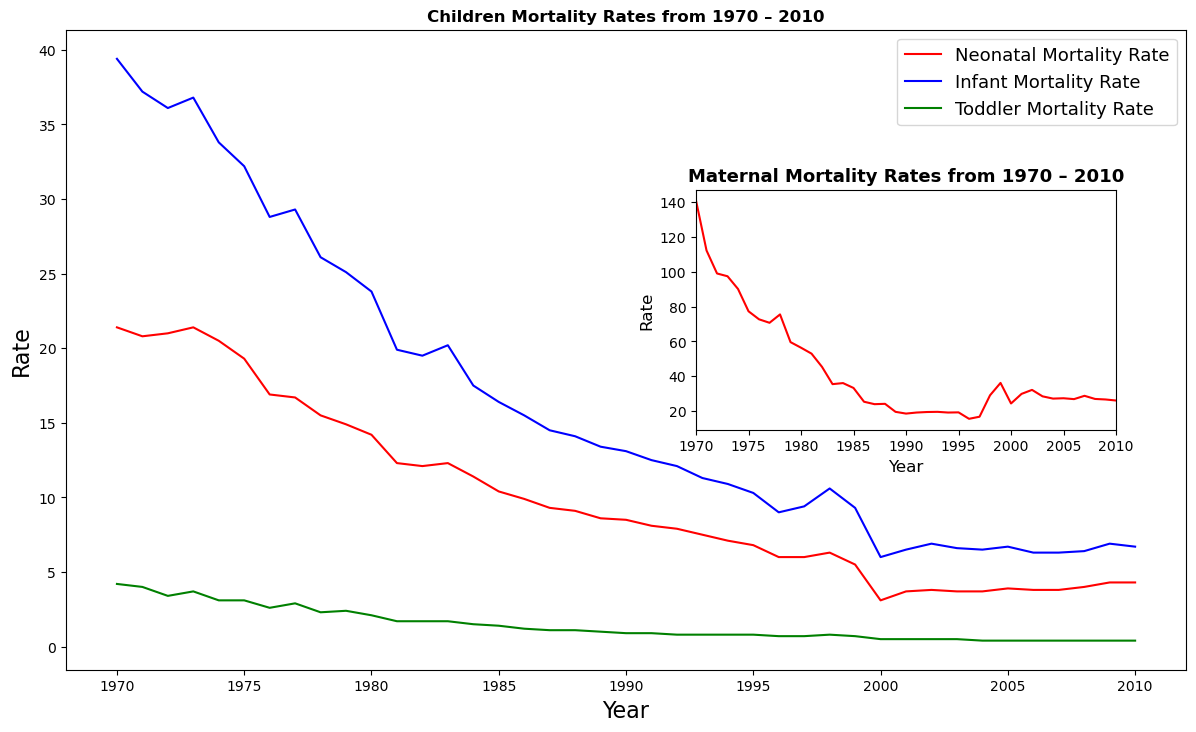

In [165]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,8))

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.plot(q3['Year'], q3['Neonatal Mortality Rate'], color='red', label='Neonatal Mortality Rate')
ax1.plot(q3['Year'], q3['Infant Mortality Rate'], color='blue', label='Infant Mortality Rate')
ax1.plot(q3['Year'], q3['Toddler Mortality Rate'], color='green', label='Toddler Mortality Rate')
ax1.set_title('Children Mortality Rates from 1970 – 2010', fontweight='bold')
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Rate', fontsize=16)
ax1.legend(loc='upper right', fontsize=13)

ax2 = fig.add_axes([0.55, 0.4, 0.3, 0.3])
ax2.plot(q3['Year'], q3['Maternal Mortality Rate'], color='red')
ax2.set_title('Maternal Mortality Rates from 1970 – 2010', fontweight='bold', fontsize=13)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Rate', fontsize=12)
ax2.set_xlim(1970,2010)


plt.show()


# Question 4
(a) Answer the following questions using the data provided (data-q4-1.csv). The data file
contains the salary record for 15 staffs from 3 different departments in a company. Write the
python codes that read the data file and perform following tasks:

(i) Read the data, compute the increment amount based on the individual increment
percentage, save the values into a new column named “increment_amount”.
(3 marks)

(ii) Then, use column aggregation to get new salary by adding the increment_amount to
the salary value. You should be able to produce a new data frame as follows:
(4 marks)

(iii) Group the new data according to departments. (1 mark)

(iv) From the grouped data, show the description of data for each department. (1 mark)
7

(v) From the grouped data, Select the new salary and find the average new salary, max
and min values. Rename the output column names into “Average salary”, “Max
salary”, “Min salary” respectively. (

In [169]:
#i
q4 = pd.read_csv('data-q4-1.csv')
q4

staff_id department  salary  increment
0     S0001         HR    3500       0.03
1     S0002      Sales    5000       0.06
2     S0003         IT    3000       0.02
3     S0004      Sales    4300       0.05
4     S0005      Sales    3200       0.09
5     S0006         HR    3200       0.06
6     S0007         HR    3100       0.03
7     S0008         IT    3500       0.02
8     S0009         IT    4000       0.06
9     S0010         HR    4100       0.01
10    S0011      Sales    4000       0.08
11    S0012      Sales    4200       0.09
12    S0013         IT    2300       0.04
13    S0014         IT    2500       0.04
14    S0015         HR    3600       0.08

In [171]:
q4['increment_amount'] = q4['salary'] * (q4['increment'])
q4

staff_id department  salary  increment  increment_amount
0     S0001         HR    3500       0.03             105.0
1     S0002      Sales    5000       0.06             300.0
2     S0003         IT    3000       0.02              60.0
3     S0004      Sales    4300       0.05             215.0
4     S0005      Sales    3200       0.09             288.0
5     S0006         HR    3200       0.06             192.0
6     S0007         HR    3100       0.03              93.0
7     S0008         IT    3500       0.02              70.0
8     S0009         IT    4000       0.06             240.0
9     S0010         HR    4100       0.01              41.0
10    S0011      Sales    4000       0.08             320.0
11    S0012      Sales    4200       0.09             378.0
12    S0013         IT    2300       0.04              92.0
13    S0014         IT    2500       0.04             100.0
14    S0015         HR    3600       0.08             288.0

In [173]:
#ii rearrange
q4['new_salary'] = q4['salary'] + q4['increment_amount']
q4

staff_id department  salary  increment  increment_amount  new_salary
0     S0001         HR    3500       0.03             105.0      3605.0
1     S0002      Sales    5000       0.06             300.0      5300.0
2     S0003         IT    3000       0.02              60.0      3060.0
3     S0004      Sales    4300       0.05             215.0      4515.0
4     S0005      Sales    3200       0.09             288.0      3488.0
5     S0006         HR    3200       0.06             192.0      3392.0
6     S0007         HR    3100       0.03              93.0      3193.0
7     S0008         IT    3500       0.02              70.0      3570.0
8     S0009         IT    4000       0.06             240.0      4240.0
9     S0010         HR    4100       0.01              41.0      4141.0
10    S0011      Sales    4000       0.08             320.0      4320.0
11    S0012      Sales    4200       0.09             378.0      4578.0
12    S0013         IT    2300       0.04              92.0      2392.0
13    S0014         IT    2500       0.04             100.0      2600.0
14    S0015         HR    3600       0.08             288.0      3888.0

In [174]:
q4ii = q4[['department','new_salary', 'staff_id']]
q4ii

department  new_salary staff_id
0          HR      3605.0    S0001
1       Sales      5300.0    S0002
2          IT      3060.0    S0003
3       Sales      4515.0    S0004
4       Sales      3488.0    S0005
5          HR      3392.0    S0006
6          HR      3193.0    S0007
7          IT      3570.0    S0008
8          IT      4240.0    S0009
9          HR      4141.0    S0010
10      Sales      4320.0    S0011
11      Sales      4578.0    S0012
12         IT      2392.0    S0013
13         IT      2600.0    S0014
14         HR      3888.0    S0015

In [194]:
#iii groupby departments
q4ii_by_dep = q4ii.groupby('department')[['new_salary', 'staff_id']]
print(q4ii_by_dep.agg({'new_salary': 'sum', 'staff_id': 'sum'}).reset_index())

  department  new_salary                   staff_id
0         HR     18219.0  S0001S0006S0007S0010S0015
1         IT     15862.0  S0003S0008S0009S0013S0014
2      Sales     22201.0  S0002S0004S0005S0011S0012


In [188]:
q4ii_by_dep.describe()

new_salary                                                      \
                count    mean         std     min     25%     50%     75%   
department                                                                  
HR                5.0  3643.8  379.134145  3193.0  3392.0  3605.0  3888.0   
IT                5.0  3172.4  749.525717  2392.0  2600.0  3060.0  3570.0   
Sales             5.0  4440.2  649.032511  3488.0  4320.0  4515.0  4578.0   

                    
               max  
department          
HR          4141.0  
IT          4240.0  
Sales       5300.0

In [197]:
# Assuming 'q4ii_by_dep' is your grouped DataFrame
q4ii_by_dep = q4ii.groupby('department')['new_salary'].agg(['mean', 'max', 'min']).reset_index()

# Rename the output columns
q4ii_by_dep = q4ii_by_dep.rename(columns={'mean': 'Average salary', 'max': 'Max salary', 'min': 'Min salary'})

# Display the result
print(q4ii_by_dep)

  department  Average salary  Max salary  Min salary
0         HR          3643.8      4141.0      3193.0
1         IT          3172.4      4240.0      2392.0
2      Sales          4440.2      5300.0      3488.0


(b) Read the data file (data-q4-2.csv), this data is an example of a supermarket sales.
Using this data, generate following output.

(i) Show the number of transactions from different types of members in different cities.
(3 marks)

(ii) Show the maximum ratings for each type of product against different types of
customers and their genders. (3 marks)

(iii) Show the total gross income according to the city against different types of products. (3 marks)

(iv) Show the number of usages of each of the payment types against different genders and
their membership type. (3 marks)

In [212]:
#i
d4b = pd.read_csv('data-q4-2.csv')
d4b.head(5)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [213]:
# Show the number of transactions from different types of members in different cities. (3 marks)
trans_cities = d4b.groupby(['City', 'Customer type'])['Invoice ID'].count()
trans_cities

City       Customer type
Mandalay   Member           18
           Normal           12
Naypyitaw  Member           15
           Normal           20
Yangon     Member           17
           Normal           18
Name: Invoice ID, dtype: int64

In [216]:
#(ii) Show the maximum ratings for each type of product against different types of customers and their genders.
d4b.groupby(['Product line', 'Customer type', 'Gender'])['Rating'].max()

Product line            Customer type  Gender
Electronic accessories  Member         Female     9.5
                                       Male       8.1
                        Normal         Female     9.6
                                       Male       9.9
Fashion accessories     Member         Female     9.9
                                       Male       8.6
                        Normal         Female     7.7
                                       Male       9.9
Food and beverages      Member         Female     8.5
                                       Male       9.5
                        Normal         Female     9.6
                                       Male       9.6
Health and beauty       Member         Female     9.1
                                       Male       8.6
                        Normal         Female     7.6
                                       Male       7.4
Home and lifestyle      Member         Female     8.5
                                    

In [217]:
#(iii) Show the total gross income according to the city against different types of products.
d4b.groupby(['City', 'Product line'])['gross income'].sum()

City       Product line          
Mandalay   Electronic accessories     29.5730
           Fashion accessories        60.9615
           Food and beverages         61.1005
           Health and beauty         149.8495
           Home and lifestyle         50.1600
           Sports and travel         142.2770
Naypyitaw  Electronic accessories    146.1245
           Fashion accessories       114.3445
           Food and beverages        199.0210
           Health and beauty          66.1915
           Home and lifestyle         68.5860
           Sports and travel          70.8455
Yangon     Electronic accessories     73.2835
           Fashion accessories        17.7715
           Food and beverages         66.1385
           Health and beauty         178.4210
           Home and lifestyle        111.4620
           Sports and travel         138.0475
Name: gross income, dtype: float64

In [221]:
#iv) Show the number of usages of each of the payment types against different genders and their membership type.
d4b.groupby(['Payment', 'Gender', 'Customer type'])['Invoice ID'].count()

Payment      Gender  Customer type
Cash         Female  Member            8
                     Normal            8
             Male    Member           10
                     Normal            9
Credit card  Female  Member            7
                     Normal            3
             Male    Member            7
                     Normal            8
Ewallet      Female  Member           14
                     Normal            9
             Male    Member            4
                     Normal           13
Name: Invoice ID, dtype: int64

# Question 5
